In [2]:
#library setup

import pandas as pd
import matplotlib.pyplot as plt 

In [12]:
#loading excel
file_path = '/Users/Jakub_1/DSI/visualization/02_activities/assignments/university_enrolment.xlsx'
excel_data = pd.ExcelFile(file_path)

#opening a data frame
df = excel_data.parse(sheet_name='Gender')

#filtering down within the sheet to get to the data that we want
filtered_df = df[
    #(df['Fiscal Year'] == '2022-2023') &  
    (df['Study Level'] == 'Graduate') &
    (df['Institution'] == 'Western')     
]
#print(df.columns)
print(filtered_df)

     Institution Fiscal Year Study Level    Gender Group HEADCOUNT
957      Western   2012-2013    Graduate          Female      2482
958      Western   2012-2013    Graduate            Male      2359
961      Western   2013-2014    Graduate          Female      2627
962      Western   2013-2014    Graduate            Male      2438
963      Western   2013-2014    Graduate  N/A or Another         0
967      Western   2014-2015    Graduate          Female      2821
968      Western   2014-2015    Graduate            Male      2467
969      Western   2014-2015    Graduate  N/A or Another         0
972      Western   2015-2016    Graduate          Female      2908
973      Western   2015-2016    Graduate            Male      2528
976      Western   2016-2017    Graduate          Female      3033
977      Western   2016-2017    Graduate            Male      2572
981      Western   2017-2018    Graduate          Female      3324
982      Western   2017-2018    Graduate            Male      

In [14]:
#data cleanup

#change all inapproriate values to 0
filtered_df['HEADCOUNT'] = pd.to_numeric(filtered_df['HEADCOUNT'], errors = 'coerce').fillna(0)

#make headcount an integer
filtered_df['HEADCOUNT'] =  filtered_df['HEADCOUNT'].astype(int)

print(filtered_df)

     Institution Fiscal Year Study Level    Gender Group  HEADCOUNT
957      Western   2012-2013    Graduate          Female       2482
958      Western   2012-2013    Graduate            Male       2359
961      Western   2013-2014    Graduate          Female       2627
962      Western   2013-2014    Graduate            Male       2438
963      Western   2013-2014    Graduate  N/A or Another          0
967      Western   2014-2015    Graduate          Female       2821
968      Western   2014-2015    Graduate            Male       2467
969      Western   2014-2015    Graduate  N/A or Another          0
972      Western   2015-2016    Graduate          Female       2908
973      Western   2015-2016    Graduate            Male       2528
976      Western   2016-2017    Graduate          Female       3033
977      Western   2016-2017    Graduate            Male       2572
981      Western   2017-2018    Graduate          Female       3324
982      Western   2017-2018    Graduate        

/var/folders/93/fw4w66pd2sgcwbnxdlq9215c0000gn/T/ipykernel_2488/3221729654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HEADCOUNT'] = pd.to_numeric(filtered_df['HEADCOUNT'], errors = 'coerce').fillna(0)
/var/folders/93/fw4w66pd2sgcwbnxdlq9215c0000gn/T/ipykernel_2488/3221729654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HEADCOUNT'] =  filtered_df['HEADCOUNT'].astype(int)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

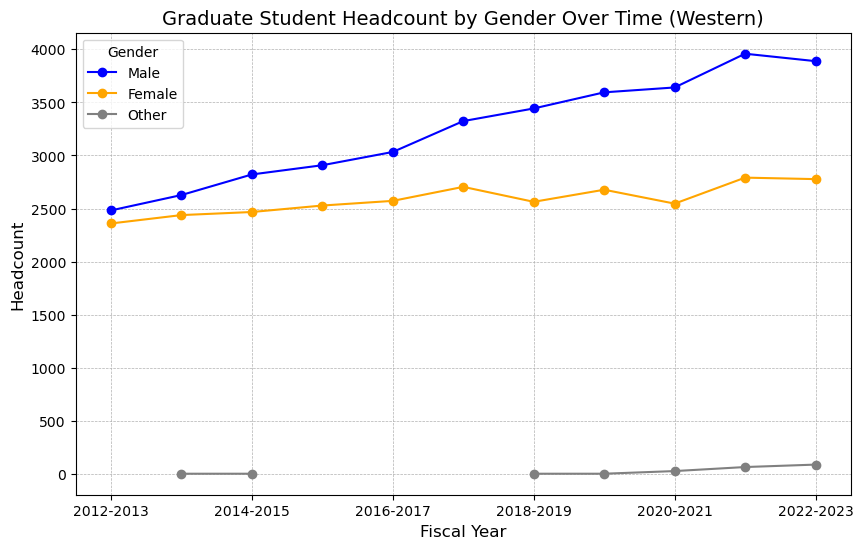

In [ ]:
#pivoting the data to get it in the format that we need
pivot_df = filtered_df.pivot(index='Fiscal Year', columns='Gender Group', values='HEADCOUNT')

#setting up the plot, predefining colors
colors = ['blue', 'orange', 'gray']
pivot_df.plot(kind='line', color = colors, figsize=(10, 6), marker='o')

# Adding the inforamtion onto the graph, adjusting stylistically
plt.title('Graduate Student Headcount by Gender Over Time (Western)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Headcount', fontsize=12)
plt.legend(['Male', 'Female', 'Other'], title='Gender', loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.tight_layout